In [1]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np
from paths import *

In [2]:
# Sum the entries in a JSON file
def sum_entries(json_file_path):
    with open(json_file_path, "r") as file:
        data = json.load(file)
    total_sum = 0
    total_sum = sum(data.values())
    return total_sum

def display_result_count(no_bias_path, bias_path):
    print("No bias found count:", sum_entries(no_bias_path))
    print("With bias found count:", sum_entries(bias_path))

In [3]:
display_result_count(no_bias_results, bias_results)

No bias found count: 1178457
With bias found count: 1186818


In [4]:
# Function for fig.png
# X and Y axes:
## Population ratio: Cities' population / whole Turkey's population
## User ratio: Among the found users in results.json, that city / whole sum
def ratio_vs_ratio_2(
    obs_dict,
    est_dict1,
    est_dict2,
):

    observed_keys = list(obs_dict.keys())
    observed_values = list(obs_dict.values())
    estimated_values1 = [est_dict1[key] for key in observed_keys]
    estimated_values2 = [est_dict2[key] for key in observed_keys]
    
    res = stats.spearmanr(list(obs_dict.values()), list(est_dict1.values()))

    res2 = stats.spearmanr(list(obs_dict.values()), list(est_dict2.values()))

    plt.figure(figsize=(10, 10))
    plt.scatter(
        observed_values,
        estimated_values1,
        color="blue",
        label="With Population Bias\n"
        + r"Spearman's $\rho$: "
        + str("{:.3f}".format(res.statistic)),
    )
    plt.scatter(
        observed_values,
        estimated_values2,
        color="gray",
        label="Without Population Bias\n"
        + r"Spearman's $\rho$: "
        + str("{:.3f}".format(res2.statistic)),
        alpha=0.5,
    )

    plt.yscale("log")
    plt.xscale("log")

    p1 = max(max(estimated_values1), max(observed_values))
    p2 = min(min(estimated_values1), min(observed_values))
    plt.plot([p1, p2], [p1, p2], "g--", color="black")

    plt.xlabel("Population Ratio")
    plt.ylabel("User Ratio")
    plt.axis("equal")

    plt.legend(fontsize=14, frameon=False)

    return plt

In [5]:
def percent_dict(dict, total):
    return_dict = {}
    for key, value in dict.items():
        percentage = value / total
        return_dict[key] = percentage

    return return_dict


def check(dict):
    total = 0
    for val in dict.values():
        total += val
    total = float(format(total, ".4f"))
    if total == 1:
        return True
    else:
        return total
    
def total(dict):
    tot = 0
    for val in dict.values():
        tot += val
    return tot


def obtain_dict(path):
    with open(path, "r") as file:
        loaded = json.load(file)
    return_dict = percent_dict(loaded, total(loaded))
    if check(return_dict):
        return return_dict
    else:
        print("Sum of the values in the resulting dictionary are bigger than 1. This should not happen.")
        return

from unidecode import unidecode

with open(populations_path, "r", encoding="utf-8") as file:
    population_list = json.load(file)

pop_dict = {}

population_list = sorted(population_list, key=lambda x: unidecode(x["name"]))

for item in population_list:
    name = unidecode(item["name"].lower())
    pop_dict[name] = item["population"]

obs_dict = percent_dict(pop_dict, total(pop_dict))
check(obs_dict)


True

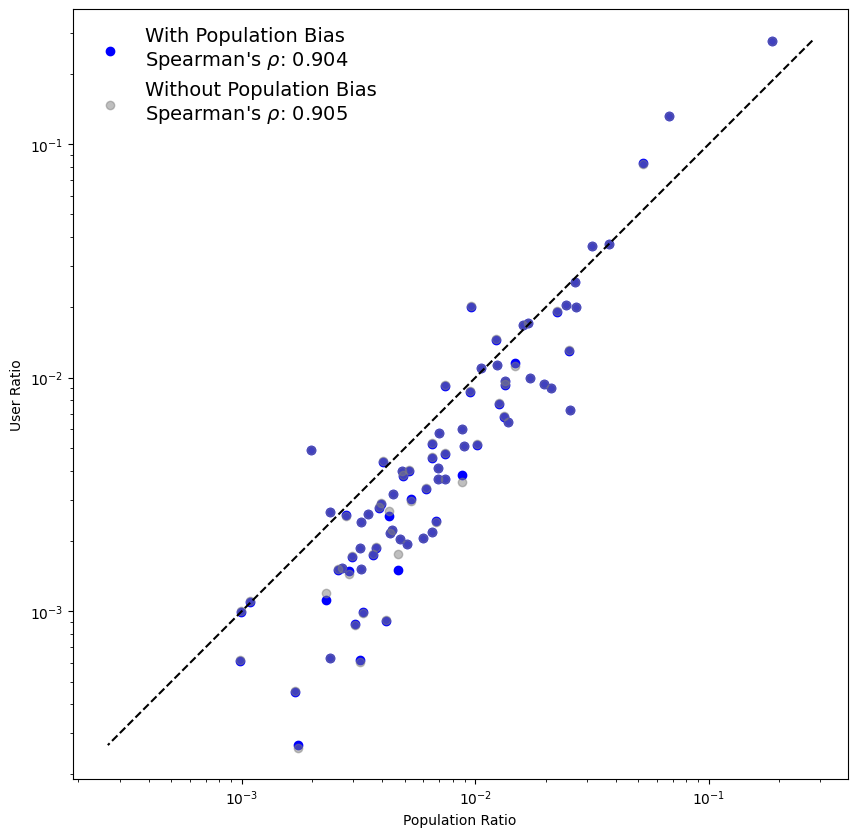

In [6]:
import warnings
warnings.filterwarnings("ignore")

bias_dict = obtain_dict(bias_results)
no_bias_dict = obtain_dict(no_bias_results)

ratio_vs_ratio_2(obs_dict, bias_dict, no_bias_dict).savefig("fig.png")

plt.show()